<a href="https://colab.research.google.com/github/RichieMartinezP/Actividades/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AF5 - Procesamiento de Datos
# Ricardo Martinez Plata - 2021191 - N4-N6
# Jesús Manuel Ulin Salas - 2128044 - N4-N6
# Luis Adrián Hernandez Dominguez - 2109514
# Fecha: 5 de septiembre de 2025


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Cargar dataset
link = "https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv"
df = pd.read_csv(link)

In [4]:
# Mostrar las primeras filas
print(df.head())

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246


In [5]:
# Info de columnas y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None


In [8]:
# Mostrar cuántos valores nulos hay por columna
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [7]:
# Eliminar cualquier fila con al menos un valor nulo
df = df.dropna()

In [15]:
# Filtrar filas con velocidad negativa

df = df[df['Velocidad (cm/s)'] >= 0]

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Columnas numéricas a normalizar

cols_to_normalize = ['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Crear el escalador y aplicar transformación

scaler = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Mostrar primeros datos normalizados

print(df_normalizado.head())

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0    0.000000        0.371735          0.182609          0.262269
1    0.001001        0.950755          0.540740          0.247509
2    0.002002        0.730954          0.873049          0.908233
3    0.003003        0.596960          0.731791          0.250082
4    0.004004        0.152134          0.806411          0.272535


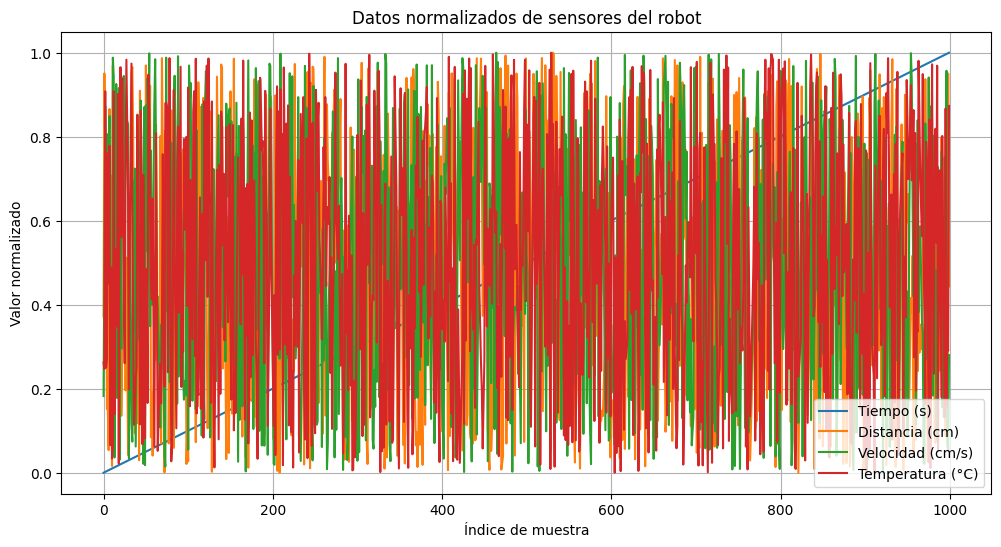

In [18]:
# Graficar cada columna normalizada

plt.figure(figsize=(12,6))
for columna in cols_to_normalize:
  plt.plot(df_normalizado[columna], label=columna)

plt.title('Datos normalizados de sensores del robot')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor normalizado')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
## 1. ¿Cómo afecta la limpieza de datos al análisis del dataset?

#La limpieza mejora la calidad de los datos al eliminar errores como valores nulos o imposibles (por ejemplo, velocidades negativas), lo cual evita que se generen conclusiones incorrectas o que los modelos de ML aprendan de forma errónea.


## 2. ¿Por qué es importante la normalización en Machine Learning?

#Porque en algoritmos sensibles a la escala (como redes neuronales, KNN, etc.), los datos con diferentes unidades o rangos pueden afectar el aprendizaje. La normalización iguala los rangos, mejorando la eficiencia y precisión del modelo.


## 3. ¿Cómo interpretarías los datos visualizados?

#La gráfica muestra cómo se comportan los sensores del robot a lo largo del tiempo. Al estar normalizados, podemos comparar fácilmente los patrones entre distancia, velocidad y temperatura sin que una variable domine por su escala.